<a href="https://colab.research.google.com/github/Ayanlola2002/Datalit/blob/master/Vehicle_loan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#load important libraries
import pandas as pd 
import numpy as np                    
import seaborn as sns                  
import matplotlib.pyplot as plt      
import warnings                       

In [0]:
#unzipping the train folder
from shutil import unpack_archive
unpack_archive('train_aox2Jxw.zip')

In [0]:
# reading the data
train_Data = pd.read_csv('train.csv')
test_Data = pd.read_csv('test_bqCt9Pv.csv')

In [122]:
# getting the shapes of the datasets
print("Shape of Train :", train_Data.shape)
print("Shape of Test :", test_Data.shape)

Shape of Train : (233154, 41)
Shape of Test : (112392, 40)


In [123]:
# lets look at the head of the train

train_Data.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [124]:
# lets look at the head of the test data

test_Data.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES
0,655269,53478,63558,86.54,67,22807,45,1497,01-01-74,Salaried,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
1,723482,55513,63163,89.45,67,22807,45,1497,20-05-85,Self employed,...,0,0,0,5605,0,1,0,0yrs 8mon,1yrs 0mon,1
2,758529,65282,84320,79.93,78,23135,86,2071,14-10-95,Salaried,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
3,763449,46905,63896,76.58,78,17014,45,2070,01-06-73,Self employed,...,0,0,0,0,0,0,0,2yrs 5mon,2yrs 5mon,0
4,708663,51428,63896,86.08,78,17014,45,2069,01-06-72,Salaried,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0


In [125]:
# let's decsribe the train set

train_Data.describe()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,...,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default
count,233154.000000,233154.000000,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,...,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000
mean,535917.573376,54356.993528,7.586507e+04,74.746530,72.936094,19638.635035,69.028054,3396.880247,7.262243,1549.477148,...,0.007244,5.427793e+03,7.295923e+03,7.179998e+03,1.310548e+04,3.232684e+02,0.381833,0.097481,0.206615,0.217071
std,68315.693711,12971.314171,1.894478e+04,11.456636,69.834995,3491.949566,22.141304,2238.147502,4.482230,975.261278,...,0.111079,1.702370e+05,1.831560e+05,1.825925e+05,1.513679e+05,1.555369e+04,0.955107,0.384439,0.706498,0.412252
min,417428.000000,13320.000000,3.700000e+04,10.030000,1.000000,10524.000000,45.000000,1.000000,1.000000,1.000000,...,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,476786.250000,47145.000000,6.571700e+04,68.880000,14.000000,16535.000000,48.000000,1511.000000,4.000000,713.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,535978.500000,53803.000000,7.094600e+04,76.800000,61.000000,20333.000000,86.000000,2970.000000,6.000000,1451.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,595039.750000,60413.000000,7.920175e+04,83.670000,130.000000,23000.000000,86.000000,5677.000000,10.000000,2362.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.999000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,671084.000000,990572.000000,1.628992e+06,95.000000,261.000000,24803.000000,156.000000,7345.000000,22.000000,3795.000000,...,8.000000,3.603285e+07,3.000000e+07,3.000000e+07,2.564281e+07,4.170901e+06,35.000000,20.000000,36.000000,1.000000


In [126]:
# let's describe the test set

test_Data.describe()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,...,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES
count,112392.000000,112392.000000,1.123920e+05,112392.000000,112392.000000,112392.000000,112392.000000,112392.000000,112392.000000,112392.000000,...,112392.000000,112392.000000,1.123920e+05,1.123920e+05,1.123920e+05,1.123920e+05,1.123920e+05,112392.000000,112392.000000,112392.000000
mean,711741.891861,56076.803269,7.718639e+04,75.310325,78.902591,19843.303545,68.366031,3014.001352,7.215754,1771.651541,...,0.012350,0.003176,2.776081e+03,3.721477e+03,3.671156e+03,1.123698e+04,1.679060e+02,0.314907,0.091884,0.226119
std,33492.215991,13123.697627,1.827149e+04,11.006380,71.469633,3555.303301,22.137265,2223.215364,4.679847,1104.533635,...,0.198374,0.073784,1.406059e+05,2.015516e+05,2.013686e+05,2.741250e+05,1.763841e+04,0.843406,0.381809,0.739231
min,654115.000000,11613.000000,4.011700e+04,10.030000,1.000000,10524.000000,45.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,-3.882000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,682658.750000,48849.000000,6.751000e+04,69.970000,15.000000,16633.000000,45.000000,1312.000000,4.000000,801.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
50%,711522.500000,55359.000000,7.258400e+04,77.780000,67.000000,20675.000000,86.000000,2412.000000,6.000000,1664.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
75%,740851.250000,62147.000000,8.004000e+04,83.740000,136.000000,23170.000000,86.000000,5092.000000,10.000000,2694.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.855000e+03,0.000000e+00,0.000000,0.000000,0.000000
max,769909.000000,940690.000000,1.271553e+06,95.000000,261.000000,24901.000000,155.000000,7345.000000,22.000000,3923.000000,...,20.000000,8.000000,3.579410e+07,5.794500e+07,5.794500e+07,8.526233e+07,5.390000e+06,22.000000,18.000000,23.000000


In [127]:
# get the info of train

train_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
UniqueID                               233154 non-null int64
disbursed_amount                       233154 non-null int64
asset_cost                             233154 non-null int64
ltv                                    233154 non-null float64
branch_id                              233154 non-null int64
supplier_id                            233154 non-null int64
manufacturer_id                        233154 non-null int64
Current_pincode_ID                     233154 non-null int64
Date.of.Birth                          233154 non-null object
Employment.Type                        225493 non-null object
DisbursalDate                          233154 non-null object
State_ID                               233154 non-null int64
Employee_code_ID                       233154 non-null int64
MobileNo_Avl_Flag                      233154 non-null int64
Aadhar_flag                   

In [128]:
# get the info of test set

test_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112392 entries, 0 to 112391
Data columns (total 40 columns):
UniqueID                               112392 non-null int64
disbursed_amount                       112392 non-null int64
asset_cost                             112392 non-null int64
ltv                                    112392 non-null float64
branch_id                              112392 non-null int64
supplier_id                            112392 non-null int64
manufacturer_id                        112392 non-null int64
Current_pincode_ID                     112392 non-null int64
Date.of.Birth                          112392 non-null object
Employment.Type                        108949 non-null object
DisbursalDate                          112392 non-null object
State_ID                               112392 non-null int64
Employee_code_ID                       112392 non-null int64
MobileNo_Avl_Flag                      112392 non-null int64
Aadhar_flag                   

In [129]:
# getting the data types of train

train_Data.dtypes

UniqueID                                 int64
disbursed_amount                         int64
asset_cost                               int64
ltv                                    float64
branch_id                                int64
supplier_id                              int64
manufacturer_id                          int64
Current_pincode_ID                       int64
Date.of.Birth                           object
Employment.Type                         object
DisbursalDate                           object
State_ID                                 int64
Employee_code_ID                         int64
MobileNo_Avl_Flag                        int64
Aadhar_flag                              int64
PAN_flag                                 int64
VoterID_flag                             int64
Driving_flag                             int64
Passport_flag                            int64
PERFORM_CNS.SCORE                        int64
PERFORM_CNS.SCORE.DESCRIPTION           object
PRI.NO.OF.ACC

In [130]:
# getting the data types of test

test_Data.dtypes

UniqueID                                 int64
disbursed_amount                         int64
asset_cost                               int64
ltv                                    float64
branch_id                                int64
supplier_id                              int64
manufacturer_id                          int64
Current_pincode_ID                       int64
Date.of.Birth                           object
Employment.Type                         object
DisbursalDate                           object
State_ID                                 int64
Employee_code_ID                         int64
MobileNo_Avl_Flag                        int64
Aadhar_flag                              int64
PAN_flag                                 int64
VoterID_flag                             int64
Driving_flag                             int64
Passport_flag                            int64
PERFORM_CNS.SCORE                        int64
PERFORM_CNS.SCORE.DESCRIPTION           object
PRI.NO.OF.ACC

In [131]:
# checking if there exists any NULL values in the train set

train_Data.isnull().sum()

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

In [132]:
# checking if there exists any NULL values in the test set

test_Data.isnull().sum()

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        3443
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

In [133]:
# checking the values present in the Employement.Type attribute in the train and test sets

train_Data['Employment.Type'].value_counts()

Self employed    127635
Salaried          97858
Name: Employment.Type, dtype: int64

In [134]:
# filling the missing values in the Employment.Type attribute of train and test sets

# Employement Type has two types of Employment i.e., self employed and salaried
# but the empty values must be the people who don't  work at all that's why it is empty
# let's fill unemployed in the place of Null values

train_Data['Employment.Type'].fillna('Unemployed', inplace = True)
test_Data['Employment.Type'].fillna('Unemployed', inplace = True)

# let's check if there is any null values still left or not
print("Null values left in the train set:", train_Data.isnull().sum().sum())
print("Null values left in the test set:", test_Data.isnull().sum().sum())

Null values left in the train set: 0
Null values left in the test set: 0


In [135]:
# let's save the unique id of the test set and labels set

unique_id = test_Data['UniqueID']
y_train = train_Data.iloc[:, -1]

# let's delete the last column from the dataset to  concat train and test
train_Data = train_Data.drop(['loan_default'], axis = 1)

# shape of train
train_Data.shape

(233154, 40)

In [136]:
# lets concat the train and test sets for preprocessing and visualizations

all_data = pd.concat([train_Data, test_Data], axis = 0)

# let's check the shape
all_data.shape

(345546, 40)

In [137]:
# let's check the employement type in the data

all_data['Employment.Type'].value_counts()

Self employed    187429
Salaried         147013
Unemployed        11104
Name: Employment.Type, dtype: int64

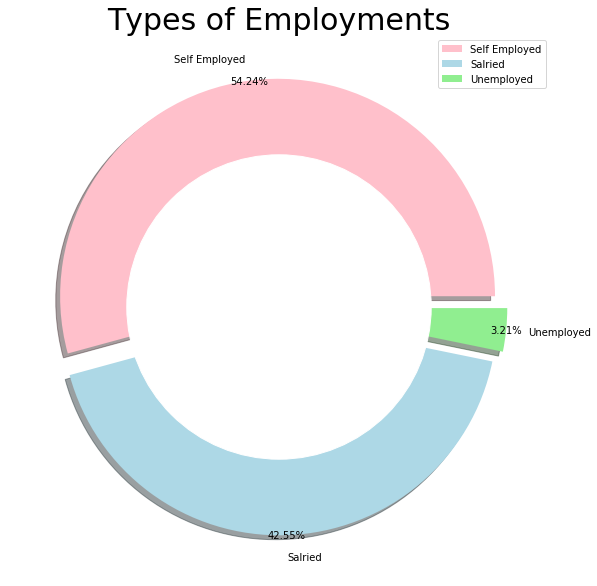

In [138]:
# plotting a donut chart

size = [187429, 147013, 11104]
colors = ['pink', 'lightblue', 'lightgreen']
labels = "Self Employed", "Salried", "Unemployed" 
explode = [0.05, 0.05, 0.05]

circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, pctdistance = 1, autopct = '%.2f%%')
plt.title('Types of Employments', fontsize = 30)
plt.axis('off')
p = plt.gcf()
p.gca().add_artist(circle)
plt.legend()
plt.show()

In [139]:
# encodings for type of employments

all_data['Employment.Type'] = all_data['Employment.Type'].replace(('Self employed', 'Salaried', 'Unemployed'), (2, 1, 0))

# checking the values  of employement type
all_data['Employment.Type'].value_counts()

2    187429
1    147013
0     11104
Name: Employment.Type, dtype: int64

In [140]:
# checking the columns names of the data

all_data.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES'],
      dtype='object')

In [141]:
#let's check the unique values of ids in different branchs

print("Total no. of Unique Ids :", all_data['UniqueID'].nunique())
print("Total no. of Unique Branches :", all_data['branch_id'].nunique())
print("Total no. of Unique Suppliers :", all_data['supplier_id'].nunique())
print("Total no. of Unique Manufactures :", all_data['manufacturer_id'].nunique())
print("Total no. of Unique Current pincode Ids :", all_data['Current_pincode_ID'].nunique())
print("Total no. of Unique State IDs :",all_data['State_ID'].nunique())
print("Total no. of Unique Employee code IDs :", all_data['Employee_code_ID'].nunique())

Total no. of Unique Ids : 345546
Total no. of Unique Branches : 82
Total no. of Unique Suppliers : 3089
Total no. of Unique Manufactures : 12
Total no. of Unique Current pincode Ids : 7096
Total no. of Unique State IDs : 22
Total no. of Unique Employee code IDs : 3398


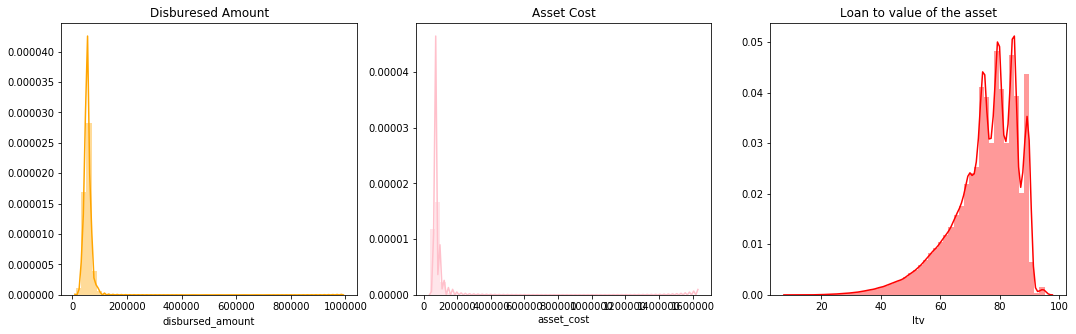

In [142]:
# check the distribution of disbursed amount

plt.rcParams['figure.figsize'] = (18, 5)

plt.subplot(1, 3, 1)
sns.distplot(all_data['disbursed_amount'],  color = 'orange')
plt.title('Disburesed Amount')

plt.subplot(1, 3, 2)
sns.distplot(all_data['asset_cost'], color = 'pink')
plt.title('Asset Cost')

plt.subplot(1, 3, 3)
sns.distplot(all_data['ltv'], color = 'red')
plt.title('Loan to value of the asset')

plt.show()

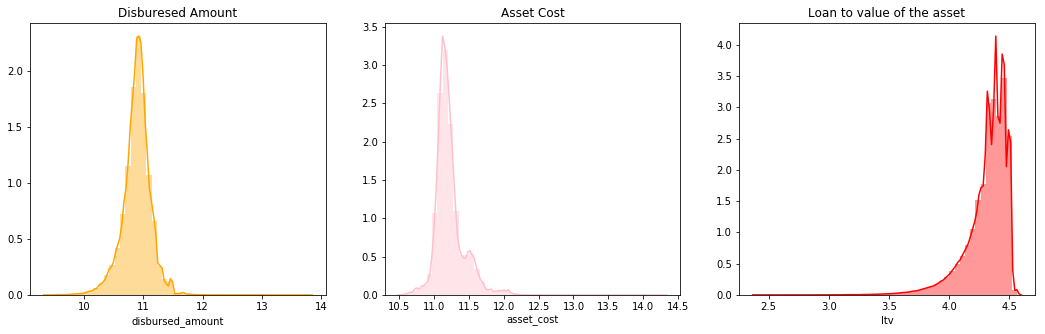

In [143]:
#performing log transformations on disbursed amount, ltv, and asset cost

all_data['disbursed_amount'] = np.log1p(data['disbursed_amount'])
all_data['ltv'] = np.log1p(all_data['ltv'])
all_data['asset_cost'] = np.log1p(all_data['asset_cost'])


plt.rcParams['figure.figsize'] = (18, 5)

plt.subplot(1, 3, 1)
sns.distplot(all_data['disbursed_amount'],  color = 'orange')
plt.title('Disburesed Amount')

plt.subplot(1, 3, 2)
sns.distplot(all_data['asset_cost'], color = 'pink')
plt.title('Asset Cost')

plt.subplot(1, 3, 3)
sns.distplot(all_data['ltv'], color = 'red')
plt.title('Loan to value of the asset')

plt.show()

Text(0.5, 1.0, 'Distribution of Year of birth')

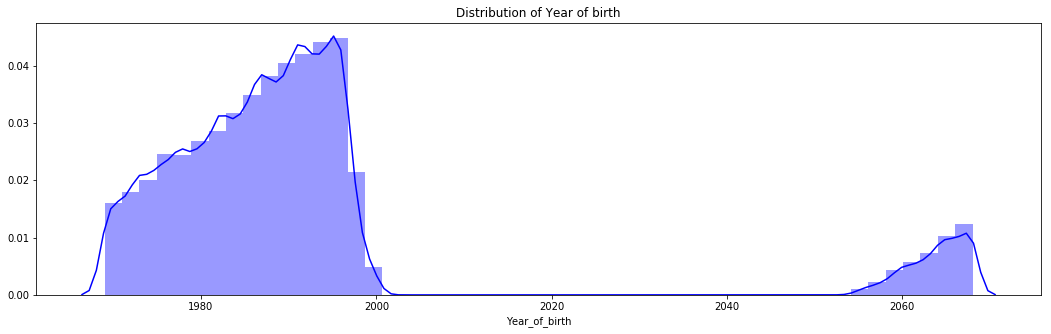

In [144]:
# date of birth is an useless attribute 
#  the only thing we can extract the is the year of birth
# let's first convert the date into date-time format

all_data['Date.of.Birth'] = pd.to_datetime(all_data['Date.of.Birth'], errors = 'coerce')

# extracting the year of birth of the customers
all_data['Year_of_birth'] = all_data['Date.of.Birth'].dt.year

# checking the values inside date of year
sns.distplot(all_data['Year_of_birth'], color = 'blue')
plt.title('Distribution of Year of birth')

Text(0.5, 1.0, 'No. of Inquiries')

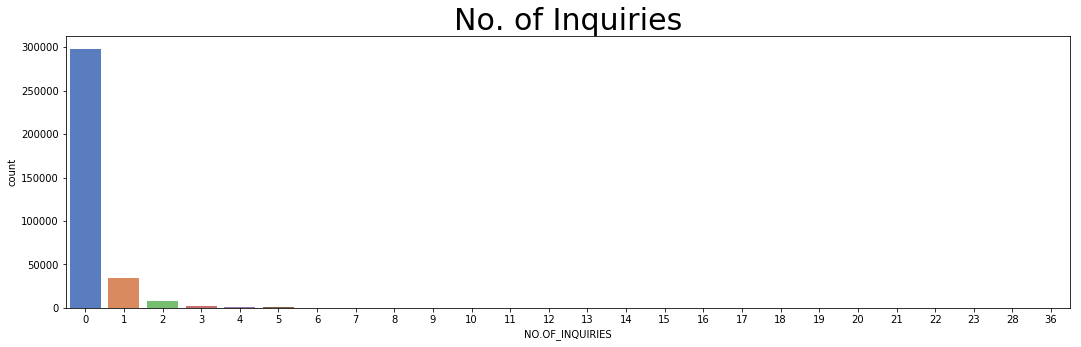

In [145]:
# plotting a countplot

sns.countplot(all_data['NO.OF_INQUIRIES'], palette = 'muted')
plt.title('No. of Inquiries',  fontsize = 30)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text xticklabel objects>)

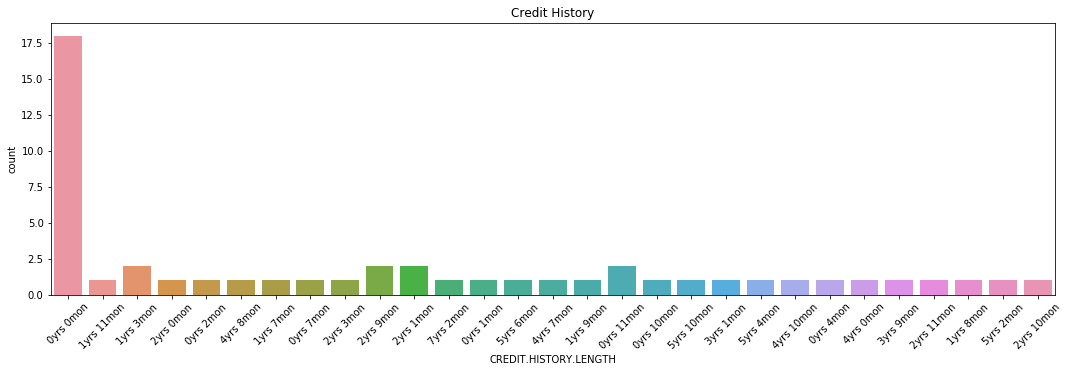

In [146]:
# plotting countplot for credit history of users

plt.rcParams['figure.figsize'] = (18, 5)
sns.countplot(all_data['CREDIT.HISTORY.LENGTH'].head(50))
plt.title('Credit History')
plt.xticks(rotation = 45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text xticklabel objects>)

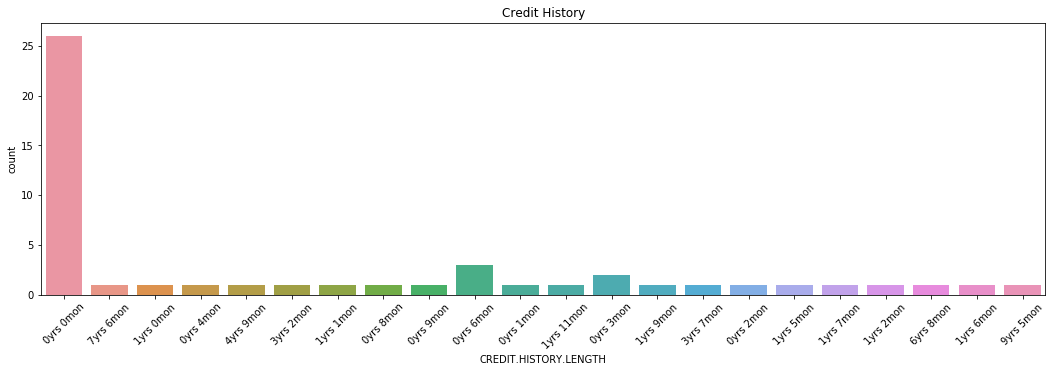

In [147]:
# plotting countplot for credit history of users

plt.rcParams['figure.figsize'] = (18, 5)
sns.countplot(all_data['CREDIT.HISTORY.LENGTH'].tail(50))
plt.title('Credit History')
plt.xticks(rotation = 45)

In [0]:
# changing the credit history format from ayrsbmonths to years 
# as no. of years are more important

all_data['CREDIT.HISTORY.LENGTH'] = all_data['CREDIT.HISTORY.LENGTH'].apply(lambda x: x.split(' ')[0])
all_data['CREDIT.HISTORY.LENGTH'] = all_data['CREDIT.HISTORY.LENGTH'].apply(lambda x: x.split('yrs')[0])
#data['CREDIT.HISTORY.LENGTH'].value_counts()

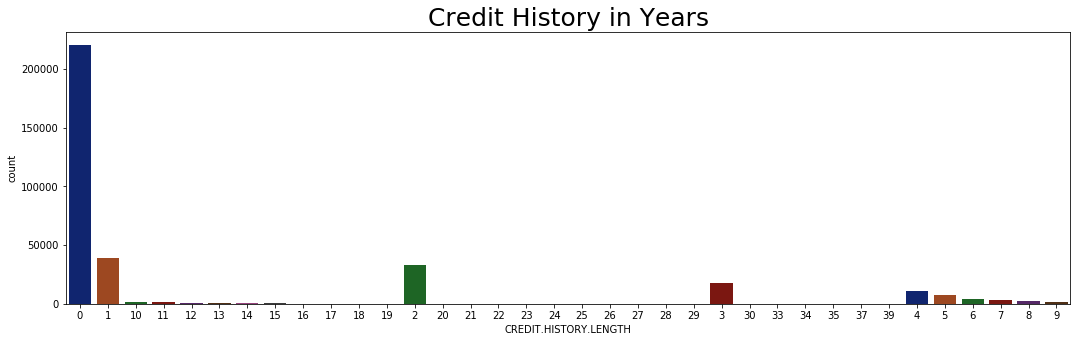

In [149]:
# distribution of credit history years

plt.rcParams['figure.figsize'] = (18, 5)
sns.countplot(all_data['CREDIT.HISTORY.LENGTH'], palette = 'dark')
plt.title('Credit History in Years', fontsize = 25)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

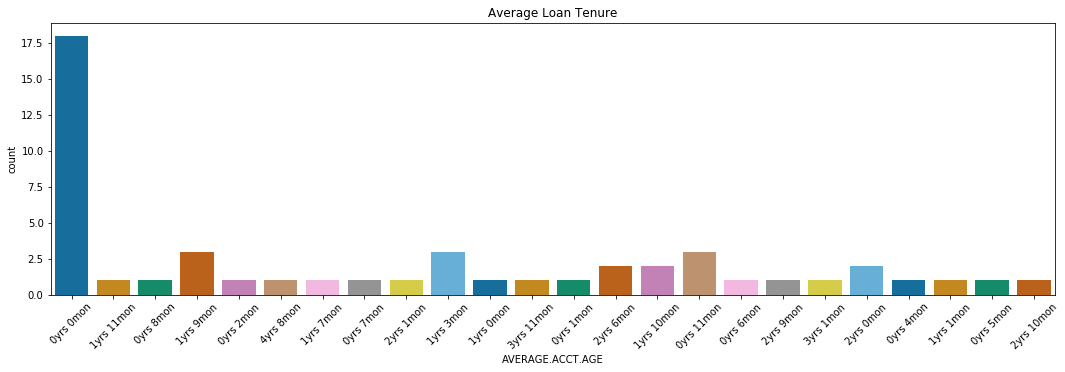

In [150]:
# average.acct.age i.e., average loan tenure

sns.countplot(all_data['AVERAGE.ACCT.AGE'].head(50), palette = 'colorblind')
plt.title('Average Loan Tenure')
plt.xticks(rotation = 45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

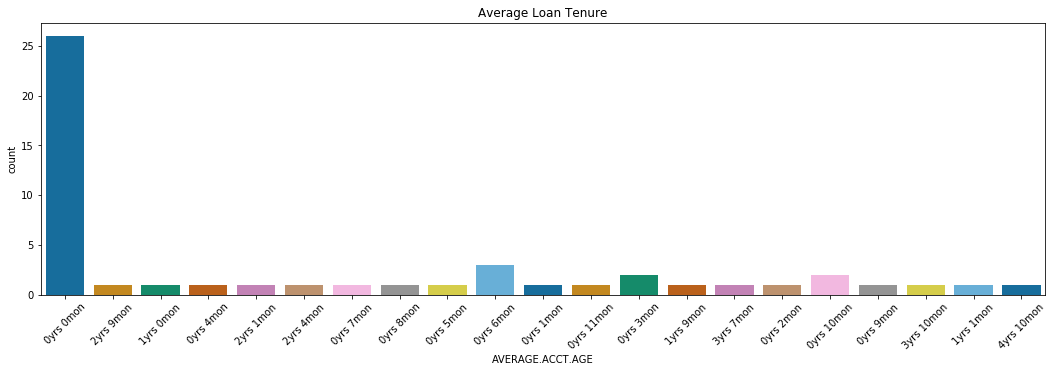

In [151]:
# average.acct.age i.e., average loan tenure

sns.countplot(all_data['AVERAGE.ACCT.AGE'].tail(50), palette = 'colorblind')
plt.title('Average Loan Tenure')
plt.xticks(rotation = 45)

In [152]:
# changing the average account age format from ayrsbmonths to years 
# as no. of years are more important

all_data['AVERAGE.ACCT.AGE'] = all_data['AVERAGE.ACCT.AGE'].apply(lambda x: x.split(' ')[0])
all_data['AVERAGE.ACCT.AGE'] = all_data['AVERAGE.ACCT.AGE'].apply(lambda x: x.split('yrs')[0])
all_data['AVERAGE.ACCT.AGE'].value_counts()

0     249836
1      54096
2      22028
3       9702
4       4530
5       2329
6       1242
7        704
8        345
9        228
10       180
11       153
12        73
13        48
14        24
15        14
16         7
17         2
30         1
22         1
24         1
25         1
18         1
Name: AVERAGE.ACCT.AGE, dtype: int64

In [153]:
# loans defaulted in last six months

all_data['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'].value_counts()

0     319144
1      21684
2       3550
3        790
4        220
5         78
6         29
7         21
8         10
9          7
12         5
11         3
10         2
20         1
18         1
16         1
Name: DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS, dtype: int64

In [154]:
# new loans taken by the customer before disbursement

all_data['NEW.ACCTS.IN.LAST.SIX.MONTHS'].value_counts()

0     272341
1      45965
2      15618
3       6161
4       2636
5       1287
6        625
7        383
8        197
9        109
10        82
11        47
12        28
13        18
14        11
17         9
16         8
15         4
19         4
20         4
18         2
22         2
23         2
28         1
21         1
35         1
Name: NEW.ACCTS.IN.LAST.SIX.MONTHS, dtype: int64

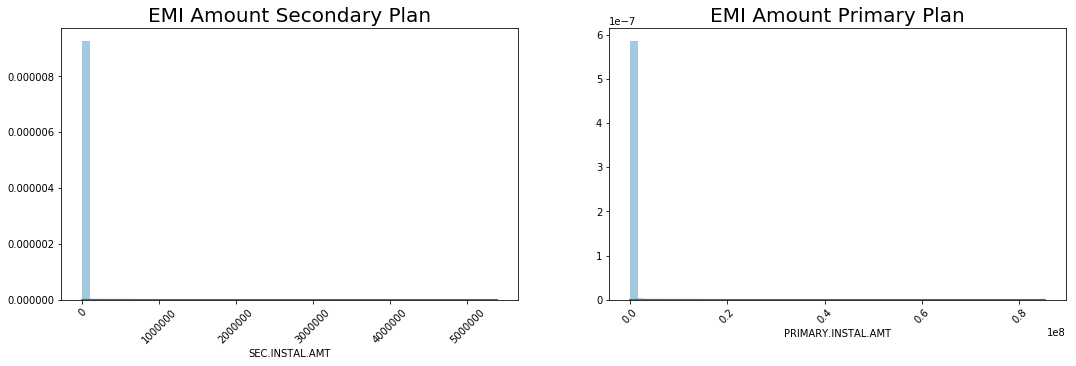

In [155]:
# EMI Amount of the Secondary Plan

plt.subplot(1, 2, 1)
sns.distplot(all_data['SEC.INSTAL.AMT'])
plt.title('EMI Amount Secondary Plan', fontsize = 20)
plt.xticks(rotation = 45)

plt.subplot(1, 2, 2)
sns.distplot(all_data['PRIMARY.INSTAL.AMT'])
plt.title('EMI Amount Primary Plan', fontsize = 20)
plt.xticks(rotation = 45)

plt.show()

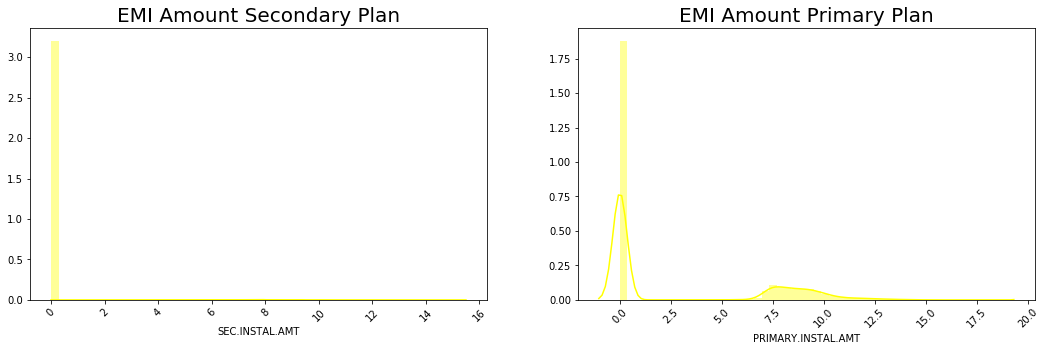

In [156]:
# let's apply log transformations on EMI Amount of the Primary Loan and Secondary loan

all_data['PRIMARY.INSTAL.AMT'] = np.log1p(all_data['PRIMARY.INSTAL.AMT'])
all_data['SEC.INSTAL.AMT'] = np.log1p(all_data['SEC.INSTAL.AMT'])

plt.subplot(1, 2, 1)
sns.distplot(all_data['SEC.INSTAL.AMT'], color = 'yellow')
plt.title('EMI Amount Secondary Plan', fontsize = 20)
plt.xticks(rotation = 45)

plt.subplot(1, 2, 2)
sns.distplot(all_data['PRIMARY.INSTAL.AMT'],color = 'yellow')
plt.title('EMI Amount Primary Plan', fontsize = 20)
plt.xticks(rotation = 45)

plt.show()

(array([-10000000.,         0.,  10000000.,  20000000.,  30000000.,
         40000000.,  50000000.,  60000000.,  70000000.]),
 <a list of 9 Text xticklabel objects>)

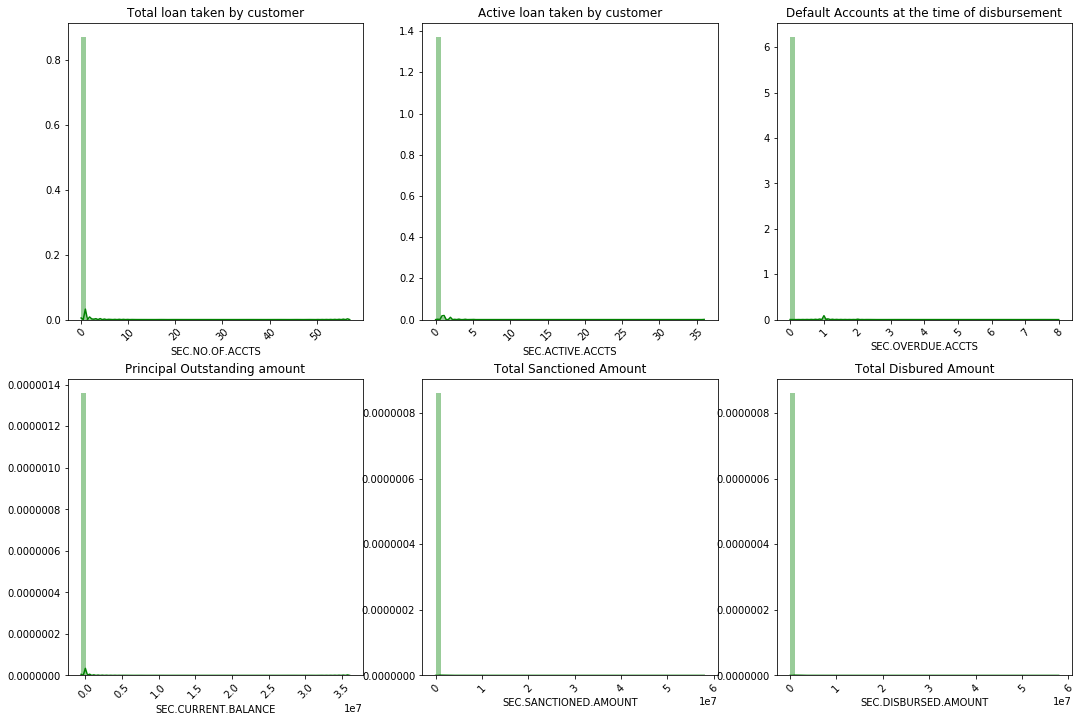

In [157]:
# distribution for different attributesof secondary accounts


plt.rcParams['figure.figsize'] = (18, 12)    
plt.subplot(2, 3, 1)
sns.distplot(all_data['SEC.NO.OF.ACCTS'], color = 'green')
plt.title('Total loan taken by customer')
plt.xticks(rotation = 45)

plt.subplot(2, 3, 2)
sns.distplot(all_data['SEC.ACTIVE.ACCTS'], color = 'green')
plt.title('Active loan taken by customer')
plt.xticks(rotation = 45)

plt.subplot(2, 3, 3)
sns.distplot(all_data['SEC.OVERDUE.ACCTS'], color = 'green')
plt.title('Default Accounts at the time of disbursement')
plt.xticks(rotation = 45)

plt.subplot(2, 3, 4)
sns.distplot(all_data['SEC.CURRENT.BALANCE'], color = 'green')
plt.title('Principal Outstanding amount')
plt.xticks(rotation = 45)

plt.subplot(2, 3, 5)
sns.distplot(all_data['SEC.SANCTIONED.AMOUNT'], color = 'green')
plt.title('Total Sanctioned Amount')
plt.xticks(rotation = 45)

plt.subplot(2, 3, 6)
sns.distplot(all_data['SEC.DISBURSED.AMOUNT'], color = 'green')
plt.title('Total Disbured Amount')
plt.xticks(rotation = 45)

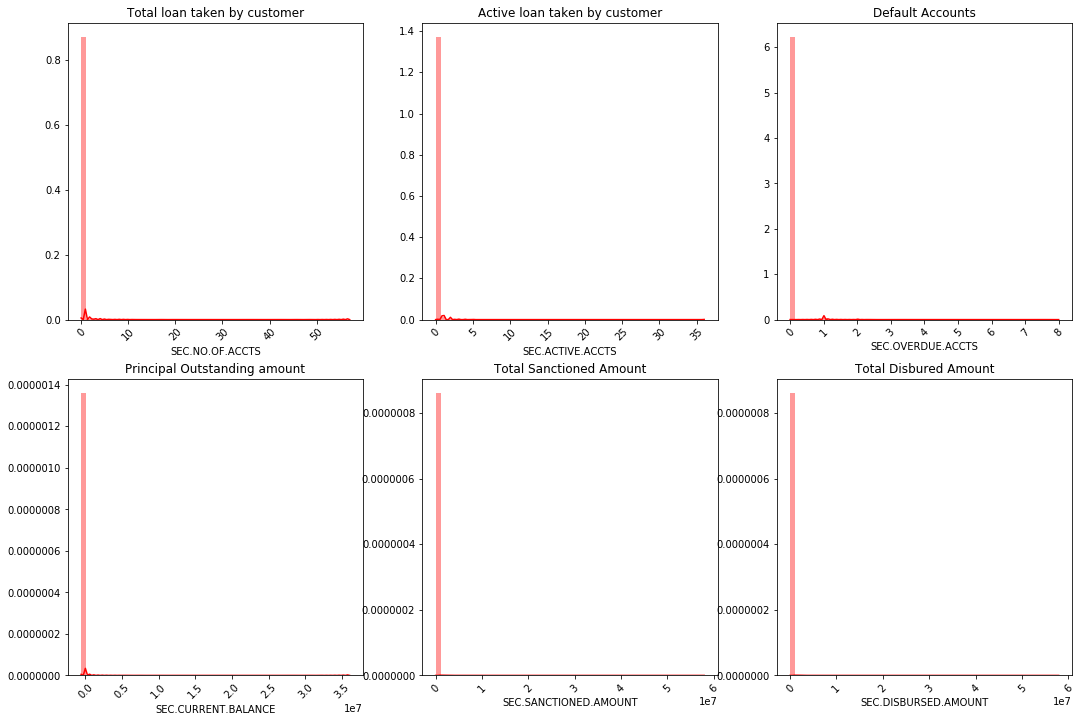

In [158]:
plt.rcParams['figure.figsize'] = (18, 12)    
plt.subplot(2, 3, 1)
sns.distplot(all_data['SEC.NO.OF.ACCTS'], color = 'red')
plt.title('Total loan taken by customer')
plt.xticks(rotation = 45)

plt.subplot(2, 3, 2)
sns.distplot(all_data['SEC.ACTIVE.ACCTS'], color = 'red')
plt.title('Active loan taken by customer')
plt.xticks(rotation = 45)

plt.subplot(2, 3, 3)
sns.distplot(all_data['SEC.OVERDUE.ACCTS'], color = 'red')
plt.title('Default Accounts')
plt.xticks(rotation = 45)

plt.subplot(2, 3, 4)
sns.distplot(all_data['SEC.CURRENT.BALANCE'], color = 'red')
plt.title('Principal Outstanding amount')
plt.xticks(rotation = 45)

plt.subplot(2, 3, 5)
sns.distplot(all_data['SEC.SANCTIONED.AMOUNT'], color = 'red')
plt.title('Total Sanctioned Amount')
plt.xticks(rotation = 45)

plt.subplot(2, 3, 6)
sns.distplot(all_data['SEC.DISBURSED.AMOUNT'], color = 'red')
plt.title('Total Disbured Amount')
plt.xticks(rotation = 45)

plt.show()

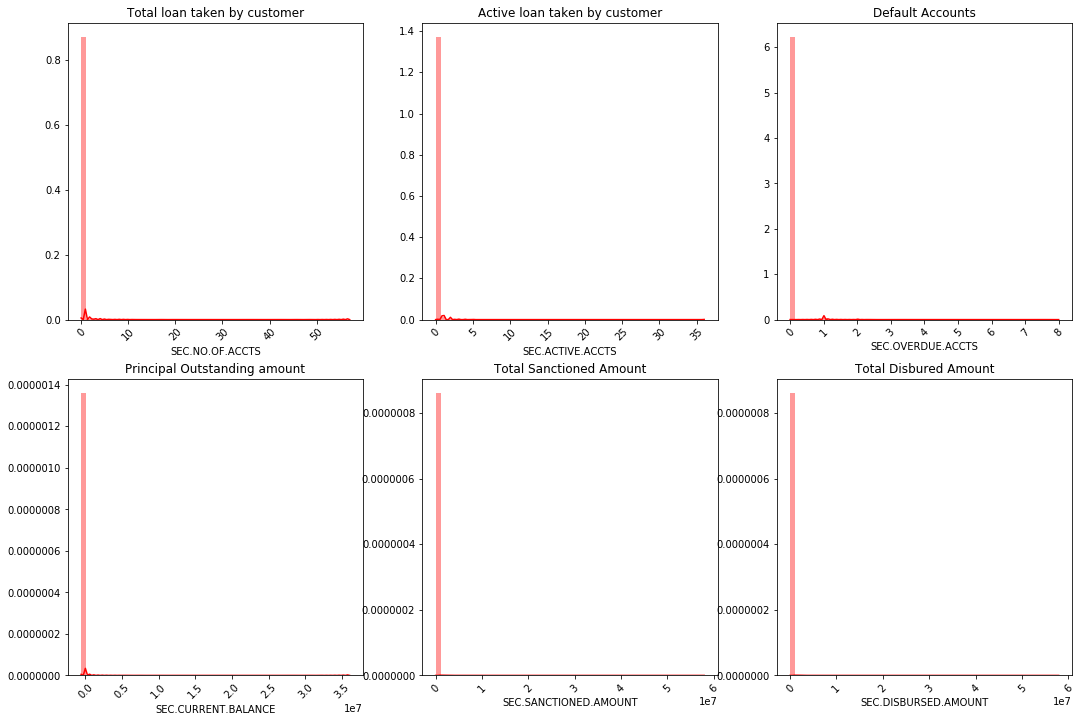

In [159]:
plt.rcParams['figure.figsize'] = (18, 12)    
plt.subplot(2, 3, 1)
sns.distplot(all_data['SEC.NO.OF.ACCTS'], color = 'red')
plt.title('Total loan taken by customer')
plt.xticks(rotation = 45)

plt.subplot(2, 3, 2)
sns.distplot(all_data['SEC.ACTIVE.ACCTS'], color = 'red')
plt.title('Active loan taken by customer')
plt.xticks(rotation = 45)

plt.subplot(2, 3, 3)
sns.distplot(all_data['SEC.OVERDUE.ACCTS'], color = 'red')
plt.title('Default Accounts')
plt.xticks(rotation = 45)

plt.subplot(2, 3, 4)
sns.distplot(all_data['SEC.CURRENT.BALANCE'], color = 'red')
plt.title('Principal Outstanding amount')
plt.xticks(rotation = 45)

plt.subplot(2, 3, 5)
sns.distplot(all_data['SEC.SANCTIONED.AMOUNT'], color = 'red')
plt.title('Total Sanctioned Amount')
plt.xticks(rotation = 45)

plt.subplot(2, 3, 6)
sns.distplot(all_data['SEC.DISBURSED.AMOUNT'], color = 'red')
plt.title('Total Disbured Amount')
plt.xticks(rotation = 45)

plt.show()

In [0]:
#  applying log transformations to the primary account attributes

all_data['PRI.NO.OF.ACCTS'] = np.log1p(all_data['PRI.NO.OF.ACCTS'])
all_data['PRI.ACTIVE.ACCTS'] = np.log1p(all_data['PRI.ACTIVE.ACCTS'])
all_data['PRI.OVERDUE.ACCTS'] = np.log1p(all_data['PRI.OVERDUE.ACCTS'])
#all_data['PRI.CURRENT.BALANCE'] = np.log1p(all_data['PRI.CURRENT.BALANCE'])
#all_data['PRI.SANCTIONED.AMOUNT'] = np.log1p(all_data['PRI.SANCTIONED.AMOUNT'])
all_data['PRI.DISBURSED.AMOUNT'] = np.log1p(all_data['PRI.DISBURSED.AMOUNT'])


#  filling  missing values in sec.current.balance
all_data['PRI.CURRENT.BALANCE'].fillna(all_data['PRI.CURRENT.BALANCE'].mean(), inplace = True)
all_data['PRI.SANCTIONED.AMOUNT'].fillna(all_data['PRI.SANCTIONED.AMOUNT'].mean(), inplace = True)

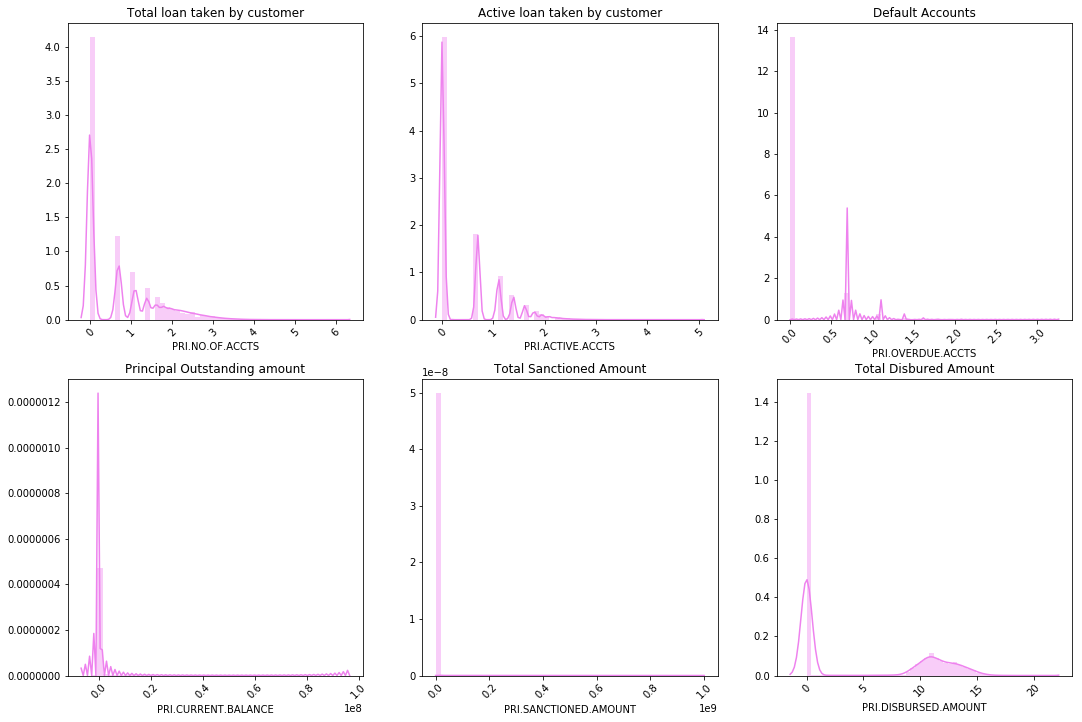

In [161]:
# plotting distribution plots for these attributes

plt.rcParams['figure.figsize'] = (18, 12)    
plt.subplot(2, 3, 1)
sns.distplot(all_data['PRI.NO.OF.ACCTS'], color = 'violet')
plt.title('Total loan taken by customer')
plt.xticks(rotation = 45)

plt.subplot(2, 3, 2)
sns.distplot(all_data['PRI.ACTIVE.ACCTS'], color = 'violet')
plt.title('Active loan taken by customer')
plt.xticks(rotation = 45)

plt.subplot(2, 3, 3)
sns.distplot(all_data['PRI.OVERDUE.ACCTS'], color = 'violet')
plt.title('Default Accounts')
plt.xticks(rotation = 45)

plt.subplot(2, 3, 4)
sns.distplot(all_data['PRI.CURRENT.BALANCE'], color = 'violet')
plt.title('Principal Outstanding amount')
plt.xticks(rotation = 45)

plt.subplot(2, 3, 5)
sns.distplot(all_data['PRI.SANCTIONED.AMOUNT'], color = 'violet')
plt.title('Total Sanctioned Amount')
plt.xticks(rotation = 45)

plt.subplot(2, 3, 6)
sns.distplot(all_data['PRI.DISBURSED.AMOUNT'], color = 'violet')
plt.title('Total Disbured Amount')
plt.xticks(rotation = 45)

plt.show()

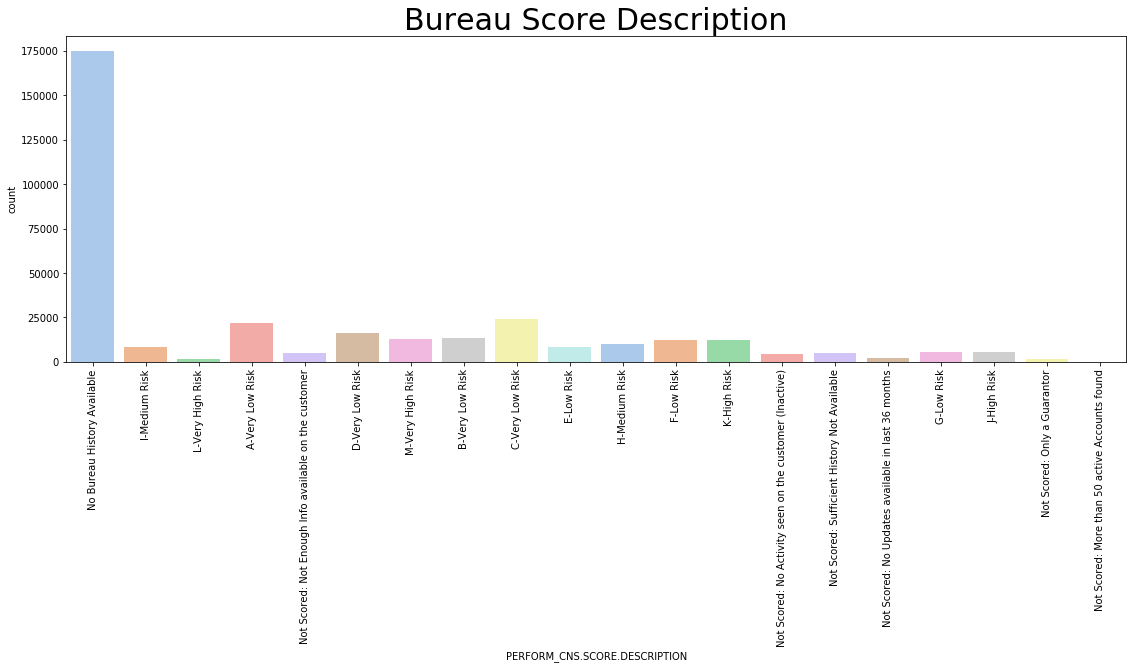

In [162]:
# checking the bureau score description

plt.rcParams['figure.figsize'] = (19, 6)
sns.countplot(all_data['PERFORM_CNS.SCORE.DESCRIPTION'], palette = 'pastel')
plt.title('Bureau Score Description', fontsize = 30)
plt.xticks(rotation = 90)
plt.show()


In [163]:
# checking the perform cns score description

all_data['PERFORM_CNS.SCORE.DESCRIPTION'].value_counts()

No Bureau History Available                                174843
C-Very Low Risk                                             23870
A-Very Low Risk                                             21683
D-Very Low Risk                                             16472
B-Very Low Risk                                             13696
M-Very High Risk                                            12808
F-Low Risk                                                  12176
K-High Risk                                                 12141
H-Medium Risk                                               10142
E-Low Risk                                                   8393
I-Medium Risk                                                8260
G-Low Risk                                                   5795
J-High Risk                                                  5526
Not Scored: Sufficient History Not Available                 5025
Not Scored: Not Enough Info available on the customer        4940
Not Scored

In [164]:
# encodings for bureau score(perform cns score distribution)

all_data['PERFORM_CNS.SCORE.DESCRIPTION'] = all_data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('No Bureau History Available', 0)
all_data['PERFORM_CNS.SCORE.DESCRIPTION'] = all_data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: Sufficient History Not Available', 0)
all_data['PERFORM_CNS.SCORE.DESCRIPTION'] = all_data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: Not Enough Info available on the customer', 0)
all_data['PERFORM_CNS.SCORE.DESCRIPTION'] = all_data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: No Activity seen on the customer (Inactive)',0)
all_data['PERFORM_CNS.SCORE.DESCRIPTION'] = all_data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: No Updates available in last 36 months', 0)
all_data['PERFORM_CNS.SCORE.DESCRIPTION'] = all_data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: Only a Guarantor', 0)
all_data['PERFORM_CNS.SCORE.DESCRIPTION'] = all_data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('Not Scored: More than 50 active Accounts found',0)
all_data['PERFORM_CNS.SCORE.DESCRIPTION'] = all_data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('M-Very High Risk', 1)
all_data['PERFORM_CNS.SCORE.DESCRIPTION'] = all_data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('L-Very High Risk', 1)
all_data['PERFORM_CNS.SCORE.DESCRIPTION'] = all_data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('K-High Risk', 2)
all_data['PERFORM_CNS.SCORE.DESCRIPTION'] = all_data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('J-High Risk', 2)
all_data['PERFORM_CNS.SCORE.DESCRIPTION'] = all_data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('I-Medium Risk', 3)
all_data['PERFORM_CNS.SCORE.DESCRIPTION'] = all_data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('H-Medium Risk', 3)
all_data['PERFORM_CNS.SCORE.DESCRIPTION'] = all_data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('G-Low Risk', 4)
all_data['PERFORM_CNS.SCORE.DESCRIPTION'] = all_data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('F-Low Risk', 4)
all_data['PERFORM_CNS.SCORE.DESCRIPTION'] = all_data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('E-Low Risk', 4)
all_data['PERFORM_CNS.SCORE.DESCRIPTION'] = all_data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('D-Very Low Risk', 5)
all_data['PERFORM_CNS.SCORE.DESCRIPTION'] = all_data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('C-Very Low Risk', 5)
all_data['PERFORM_CNS.SCORE.DESCRIPTION'] = all_data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('B-Very Low Risk', 5)
all_data['PERFORM_CNS.SCORE.DESCRIPTION'] = all_data['PERFORM_CNS.SCORE.DESCRIPTION'].replace('A-Very Low Risk', 5)

# checing the values in bureau score
all_data['PERFORM_CNS.SCORE.DESCRIPTION'].value_counts()

0    192802
5     75721
4     26364
3     18402
2     17667
1     14590
Name: PERFORM_CNS.SCORE.DESCRIPTION, dtype: int64

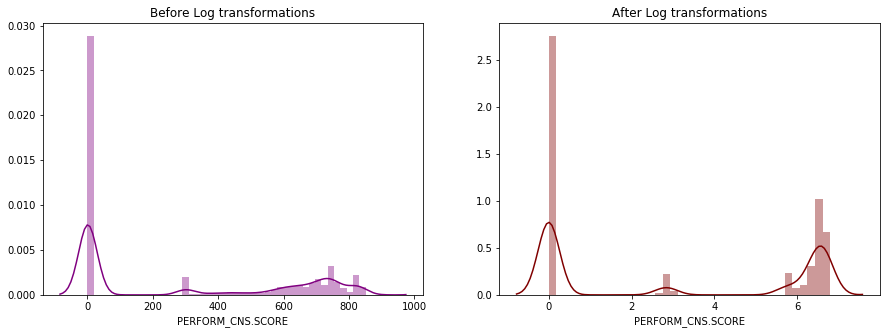

In [165]:
# checking the bureau score

plt.rcParams['figure.figsize'] = (15, 5)
plt.subplot(1, 2, 1)
sns.distplot(all_data['PERFORM_CNS.SCORE'], color = 'purple')
plt.title('Before Log transformations')

plt.subplot(1, 2, 2)
all_data['PERFORM_CNS.SCORE'] = np.log1p(all_data['PERFORM_CNS.SCORE'])
sns.distplot(all_data['PERFORM_CNS.SCORE'], color = 'maroon')
plt.title('After Log transformations')

plt.show()

In [166]:
# customer has passport or not

all_data['Passport_flag'].value_counts()

0    344835
1       711
Name: Passport_flag, dtype: int64

In [167]:
# customer has driving license or not

all_data['Driving_flag'].value_counts()

0    338249
1      7297
Name: Driving_flag, dtype: int64

In [168]:
# customer has voter-id card or not

all_data['VoterID_flag'].value_counts()

0    298155
1     47391
Name: VoterID_flag, dtype: int64

In [169]:
# customer has pan card or not

all_data['PAN_flag'].value_counts()

0    306392
1     39154
Name: PAN_flag, dtype: int64

In [170]:
# customer has aadhar card or not

all_data['Aadhar_flag'].value_counts()

1    293663
0     51883
Name: Aadhar_flag, dtype: int64

In [171]:
# customer has shared the mobile no. or not

all_data['MobileNo_Avl_Flag'].value_counts()

1    345546
Name: MobileNo_Avl_Flag, dtype: int64

In [172]:
# lets extract features from disbursal dates
# as all  the disbursement dates are of year 2018 so we can extract the months

all_data['DisbursalDate'] = pd.to_datetime(all_data['DisbursalDate'], errors = 'coerce')

# extracting the month of the disbursement
all_data['DisbursalMonth'] =all_data['DisbursalDate'].dt.month

all_data['DisbursalMonth'].value_counts()

11    99420
10    89440
8     58586
9     57939
12    10659
3      7601
6      7024
4      4627
7      4339
5      4178
1      1708
2        25
Name: DisbursalMonth, dtype: int64

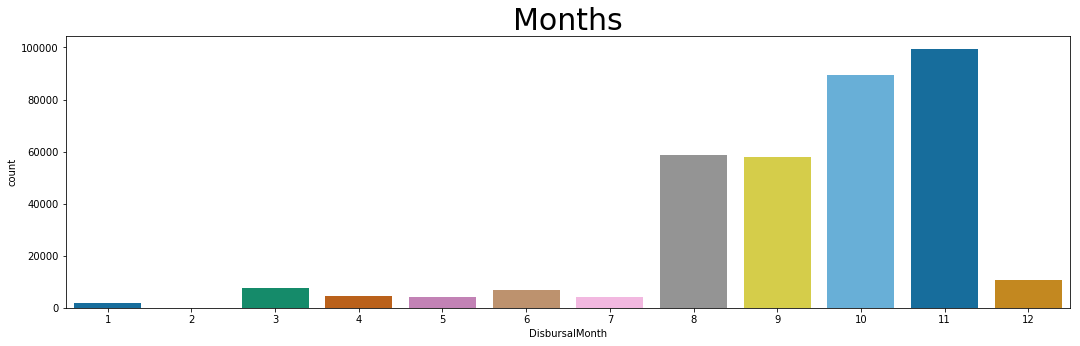

In [173]:
# plotting the Disbursal date

plt.rcParams['figure.figsize'] = (18, 5)
sns.countplot(all_data['DisbursalMonth'], palette = 'colorblind')
plt.title('Months', fontsize = 30)
plt.show()

In [0]:
# some attributes are categorical but they are in integer so let's convert them into category

all_data['branch_id'] = all_data['branch_id'].astype('category')
all_data['manufacturer_id'] =all_data['manufacturer_id'].astype('category')
all_data['State_ID'] = all_data['State_ID'].astype('category')

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
all_data['branch_id'] = le.fit_transform(all_data['branch_id'])
all_data['manufacturer_id'] = le.fit_transform(all_data['manufacturer_id'])
all_data['State_ID'] = le.fit_transform(all_data['State_ID'])

# checking the values in these attributes
#all_data['branch_id'].value_counts()
#all_data['manufacturer_id'].value_counts()
#all_data['State_ID'].value_counts()

In [175]:
# removing unnecassary columns

all_data = all_data.drop(['UniqueID', 'supplier_id', 'Current_pincode_ID', 'Date.of.Birth', 'DisbursalDate', 'Employee_code_ID'], axis = 1)

# checking the new columns of data
all_data.columns

Index(['disbursed_amount', 'asset_cost', 'ltv', 'branch_id', 'manufacturer_id',
       'Employment.Type', 'State_ID', 'MobileNo_Avl_Flag', 'Aadhar_flag',
       'PAN_flag', 'VoterID_flag', 'Driving_flag', 'Passport_flag',
       'PERFORM_CNS.SCORE', 'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS',
       'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE',
       'PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS',
       'SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE',
       'SEC.SANCTIONED.AMOUNT', 'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT',
       'SEC.INSTAL.AMT', 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
       'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'AVERAGE.ACCT.AGE',
       'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES', 'Year_of_birth',
       'DisbursalMonth'],
      dtype='object')

In [176]:
# looking at the sample of the pre-processed data

all_data.sample(5)

,disbursed_amount,asset_cost,ltv,branch_id,manufacturer_id,Employment.Type,State_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,...,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,Year_of_birth,DisbursalMonth
52381,10.503422,10.873281,4.264790,65,5,1,0,1,1,0,...,0,8.800717,0.0,2,0,0,1,0,1981,11
117627,10.989555,11.243803,4.390862,28,5,2,12,1,0,1,...,0,0.000000,0.0,0,0,0,0,0,2068,9
52415,10.906213,11.206523,4.335983,23,0,2,4,1,1,0,...,0,10.634869,0.0,1,0,2,3,0,1984,9
53180,10.860517,11.123949,4.371976,15,0,1,3,1,1,0,...,0,7.346655,0.0,0,0,0,0,0,1991,12
118012,10.835730,11.326608,4.153399,71,3,2,3,1,1,0,...,0,0.000000,0.0,0,0,0,0,0,2068,10


In [177]:
# checking the target variable

y_train.value_counts()

0    182543
1     50611
Name: loan_default, dtype: int64

In [178]:
# separating train and test datasets from data

x_train = all_data.iloc[:233154,:]
x_test = all_data.iloc[233154:,:]

# checking the shape of train and test
print("Shape of train :", x_train.shape)
print("Shape of test :", x_test.shape)

Shape of train : (233154, 36)
Shape of test : (112392, 36)


In [0]:
# there is a big difference in the no. of values for 1 and 0
# so we can apply SMOTE or over-sampling
# that means replicating the samples of 1 to lessen the parity between 0 and 1 values

# lets install imblearn
#!pip install -U imbalanced-learn

In [180]:
# applying SMOTE

from imblearn.over_sampling import SMOTE

x_resample, y_resample = SMOTE().fit_sample(x_train, y_train.values.ravel()) 

# checking the shape of x_resample and y_resample
print("Shape of x:", x_resample.shape)
print("Shape of y:", y_resample.shape)

Shape of x: (365086, 36)
Shape of y: (365086,)


In [181]:
# train and valid sets from train
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_resample, y_resample, test_size = 0.2, random_state = 0)

# checking the shapes
print(x_train.shape)
print(y_train.shape)
print(x_valid.shape)
print(y_valid.shape)

(292068, 36)
(292068,)
(73018, 36)
(73018,)


In [182]:


# standardization techniques

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_valid)
x_test = sc.transform(x_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  import sys


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Training Accuracy:  0.9882493118041004
Testing Accuarcy:  0.8122380782820674
              precision    recall  f1-score   support

           0       0.77      0.90      0.83     36647
           1       0.88      0.72      0.79     36371

   micro avg       0.81      0.81      0.81     73018
   macro avg       0.82      0.81      0.81     73018
weighted avg       0.82      0.81      0.81     73018



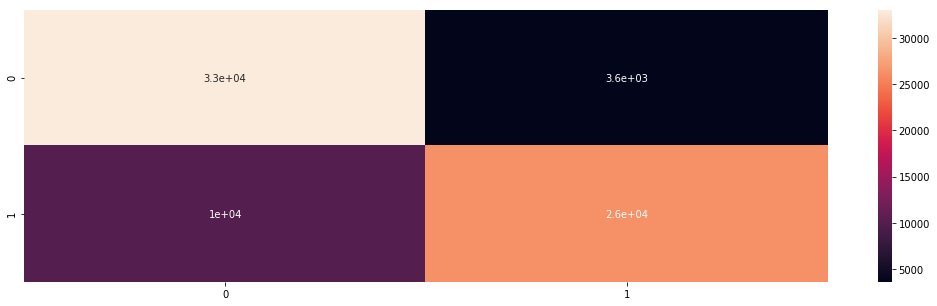

In [183]:
# Appllying RANDOM FOREST CLASSIFIER

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model_rf = RandomForestClassifier()
model_rf.fit(x_train, y_train)

y_pred = model_rf.predict(x_valid)

print("Training Accuracy: ", model_rf.score(x_train, y_train))
print('Testing Accuarcy: ', model_rf.score(x_valid, y_valid))

# making a classification report
cr = classification_report(y_valid,  y_pred)
print(cr)

# making a confusion matrix
cm = confusion_matrix(y_valid, y_pred)
sns.heatmap(cm, annot = True)

In [184]:
# Calculating the average precision score for randomforest 
from sklearn.metrics import average_precision_score

apc = average_precision_score(y_valid, y_pred)
print('Average Precision Score :', apc)

Average Precision Score : 0.7732626087582827


(0.0, 1.0)

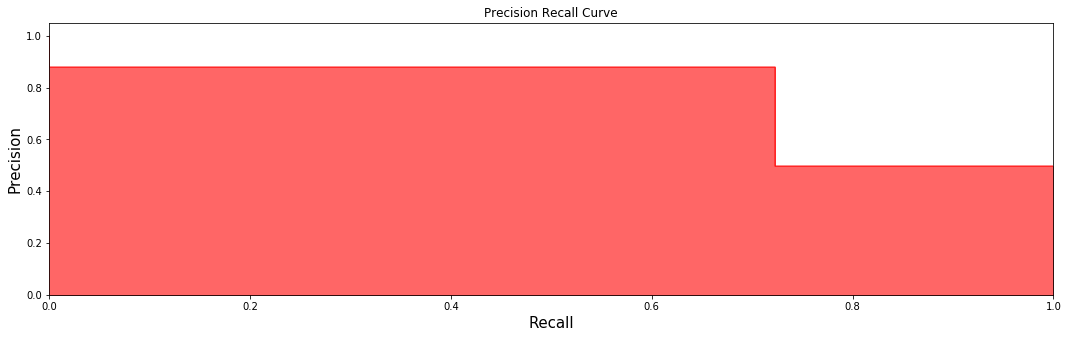

In [185]:
# plotting an AUC ROC Curve(Area under curve and receiver operating curve)

from sklearn.metrics import precision_recall_curve
from sklearn.utils.fixes import signature

precision, recall, _ = precision_recall_curve(y_valid, y_pred)

step_kwargs = ({'step':'post'} if 'step' in signature(plt.fill_between).parameters else{})

plt.step(recall, precision, color = 'red', alpha = 0.6, where = 'post')
plt.fill_between(recall, precision, color = 'red', alpha = 0.6, **step_kwargs)

plt.title('Precision Recall Curve')
plt.xlabel('Recall', fontsize = 15)
plt.ylabel('Precision', fontsize =15)
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

Training Accuracy:  0.7400981963104483
Testing Accuarcy:  0.7372702621271467
              precision    recall  f1-score   support

           0       0.72      0.79      0.75     36647
           1       0.76      0.69      0.72     36371

   micro avg       0.74      0.74      0.74     73018
   macro avg       0.74      0.74      0.74     73018
weighted avg       0.74      0.74      0.74     73018



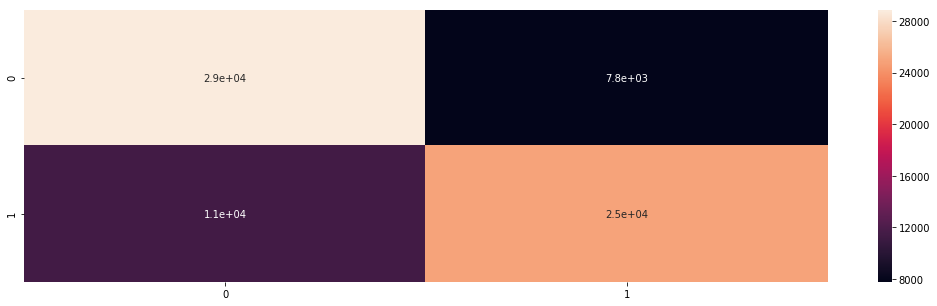

In [186]:
#Applying ADA BOOST CLASSIFIER

from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model_ada = AdaBoostClassifier()
model_ada.fit(x_train, y_train)

y_pred = model_ada.predict(x_valid)

print("Training Accuracy: ", model_ada.score(x_train, y_train))
print('Testing Accuarcy: ', model_ada.score(x_valid, y_valid))

# making a classification report
cr = classification_report(y_valid,  y_pred)
print(cr)

# making a confusion matrix
cm = confusion_matrix(y_valid, y_pred)
sns.heatmap(cm, annot = True)

In [187]:
# Calculating the avg precision score
from sklearn.metrics import average_precision_score

apc = average_precision_score(y_valid, y_pred)
print('Average Precision Score :', apc)

Average Precision Score : 0.6795546868769671


(0.0, 1.0)

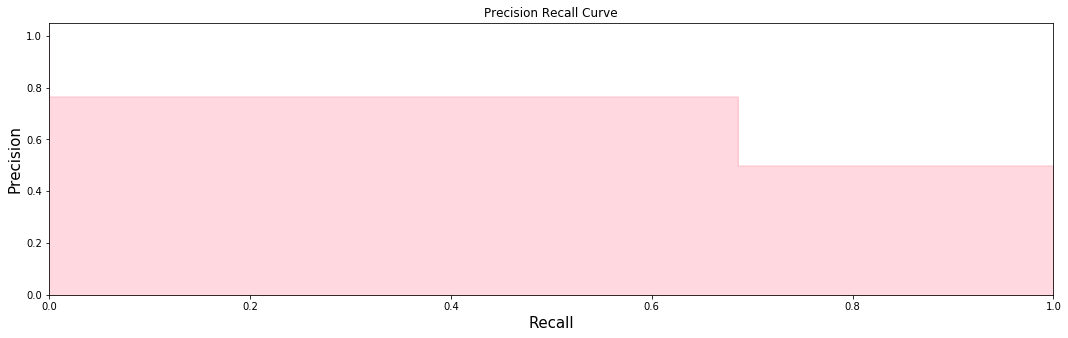

In [188]:
# plotting an AUC ROC Curve(Area under curve and receiver operating curve)

from sklearn.metrics import precision_recall_curve
from sklearn.utils.fixes import signature

precision, recall, _ = precision_recall_curve(y_valid, y_pred)

step_kwargs = ({'step':'post'} if 'step' in signature(plt.fill_between).parameters else{})

plt.step(recall, precision, color = 'pink', alpha = 0.6, where = 'post')
plt.fill_between(recall, precision, color = 'pink', alpha = 0.6, **step_kwargs)

plt.title('Precision Recall Curve')
plt.xlabel('Recall', fontsize = 15)
plt.ylabel('Precision', fontsize =15)
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

Training Accuracy:  0.8536060095594177
Testing Accuarcy:  0.8375606014955217
              precision    recall  f1-score   support

           0       0.77      0.96      0.86     36647
           1       0.94      0.72      0.81     36371

   micro avg       0.84      0.84      0.84     73018
   macro avg       0.86      0.84      0.84     73018
weighted avg       0.86      0.84      0.84     73018



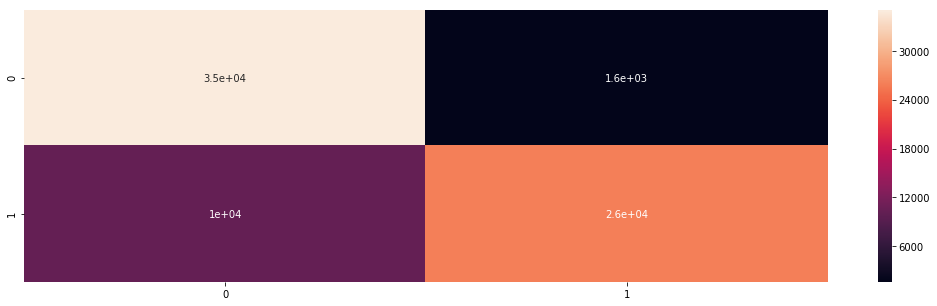

In [189]:
#Applying  Xg-Boost Classifier

from xgboost.sklearn import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model_xgb = XGBClassifier(objective="binary:logistic", 
    learning_rate=0.05, 
    seed=9616, 
    max_depth=20, 
    gamma=10, 
    n_estimators=500)
model_xgb.fit(x_train, y_train)

y_pred = model_xgb.predict(x_valid)

print("Training Accuracy: ", model_xgb.score(x_train, y_train))
print('Testing Accuarcy: ', model_xgb.score(x_valid, y_valid))

# making a classification report
cr = classification_report(y_valid,  y_pred)
print(cr)

# making a confusion matrix
cm = confusion_matrix(y_valid, y_pred)
sns.heatmap(cm, annot = True)

In [190]:
# Calculating the avg precision score
from sklearn.metrics import average_precision_score

apc = average_precision_score(y_valid, y_pred)
print('Average Precision Score :', apc)

Average Precision Score : 0.8170412931671309


(0.0, 1.0)

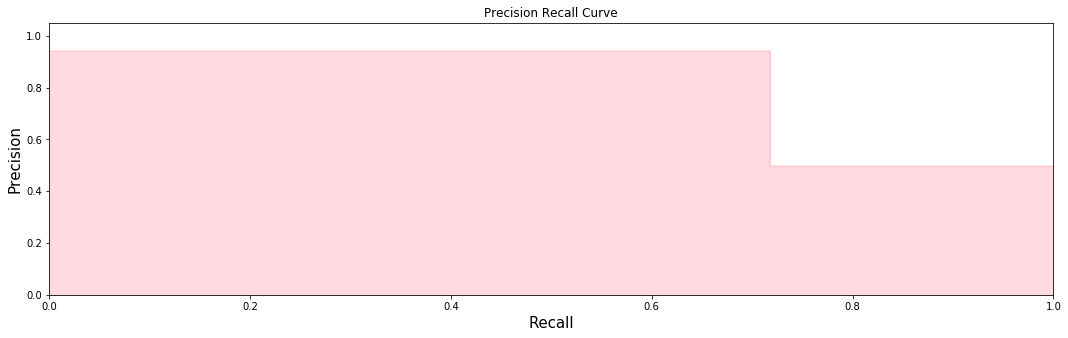

In [191]:
# plotting an AUC ROC Curve(Area under curve and receiver operating curve)

from sklearn.metrics import precision_recall_curve
from sklearn.utils.fixes import signature

precision, recall, _ = precision_recall_curve(y_valid, y_pred)

step_kwargs = ({'step':'post'} if 'step' in signature(plt.fill_between).parameters else{})

plt.step(recall, precision, color = 'pink', alpha = 0.6, where = 'post')
plt.fill_between(recall, precision, color = 'pink', alpha = 0.6, **step_kwargs)

plt.title('Precision Recall Curve')
plt.xlabel('Recall', fontsize = 15)
plt.ylabel('Precision', fontsize =15)
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

Training Accuracy:  0.8310633140227618
Testing Accuarcy:  0.8294256210797337
              precision    recall  f1-score   support

           0       0.76      0.96      0.85     36647
           1       0.94      0.70      0.80     36371

   micro avg       0.83      0.83      0.83     73018
   macro avg       0.85      0.83      0.83     73018
weighted avg       0.85      0.83      0.83     73018



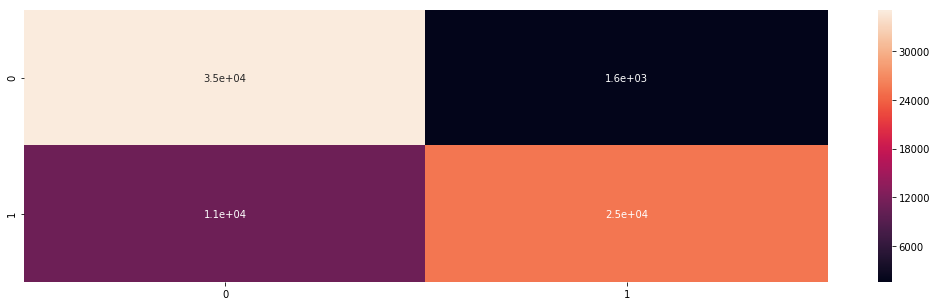

In [192]:
#Applying light boost classifier

from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model_lgb = LGBMClassifier()
model_lgb.fit(x_train, y_train)

y_pred = model_lgb.predict(x_valid)

print("Training Accuracy: ", model_lgb.score(x_train, y_train))
print('Testing Accuarcy: ', model_lgb.score(x_valid, y_valid))

# making a classification report
cr = classification_report(y_valid,  y_pred)
print(cr)

# making a confusion matrix
cm = confusion_matrix(y_valid, y_pred)
sns.heatmap(cm, annot = True)

In [193]:
#calculating the avg precision score
from sklearn.metrics import average_precision_score

apc = average_precision_score(y_valid, y_pred)
print('Average Precision Score :', apc)

Average Precision Score : 0.8091238301431009


(0.0, 1.0)

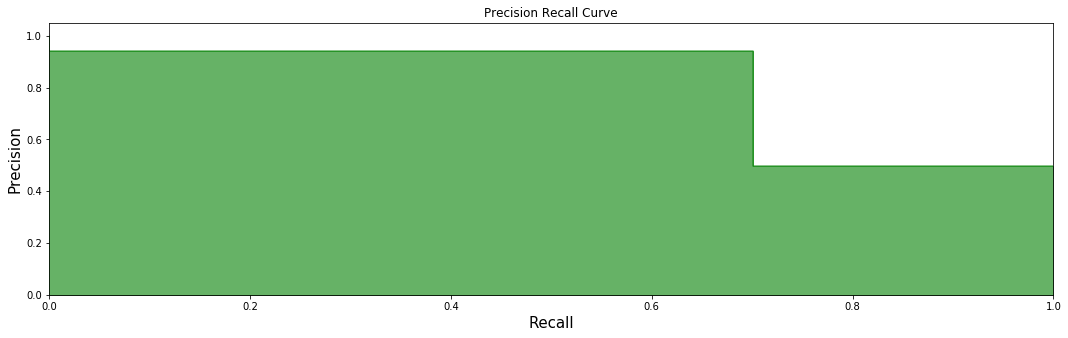

In [194]:
# plotting an AUC ROC Curve(Area under curve and receiver operating curve)

from sklearn.metrics import precision_recall_curve
from sklearn.utils.fixes import signature

precision, recall, _ = precision_recall_curve(y_valid, y_pred)

step_kwargs = ({'step':'post'} if 'step' in signature(plt.fill_between).parameters else{})

plt.step(recall, precision, color = 'green', alpha = 0.6, where = 'post')
plt.fill_between(recall, precision, color = 'green', alpha = 0.6, **step_kwargs)

plt.title('Precision Recall Curve')
plt.xlabel('Recall', fontsize = 15)
plt.ylabel('Precision', fontsize =15)
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

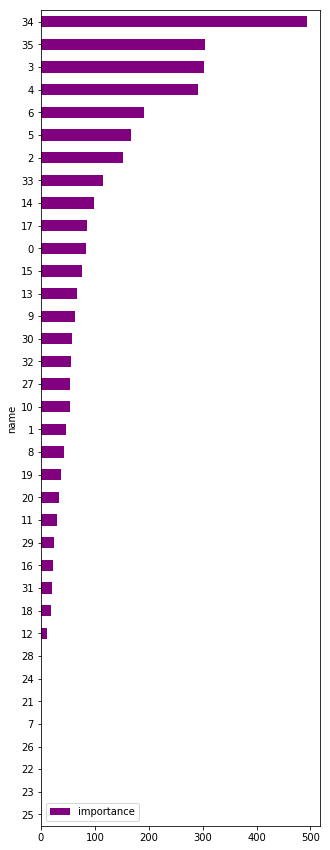

In [195]:
# let's plot the feature importance plot for the lg boost model

feature = pd.DataFrame()
x_train = pd.DataFrame(x_train)

feature['name'] = x_train.columns
feature['importance'] = model_lgb.feature_importances_

feature.sort_values(by = ['importance'], ascending = True, inplace = True)
feature.set_index('name', inplace = True)

feature.plot(kind = 'barh', color = 'purple', figsize = (5, 15), fontsize = 10)

In [0]:
# Now we use tests set

y_pred_rf = model_rf.predict(x_test)
y_pred_ada = model_ada.predict(x_test)
y_pred_xgb = model_xgb.predict(x_test)
y_pred_lgb = model_lgb.predict(x_test)

In [0]:
# Boosting
# as random forest and lgboost performed better than adaboost and xgboost
# so we prefer to give lgbbost and randomforest more importance

predictions = y_pred_rf*0.3 + y_pred_ada*0.1 + y_pred_xgb*0.3 + y_pred_xgb*0.3

In [198]:
# lets look at the submission file

submission_first = pd.read_csv('sample_submission_24jSKY6.csv')

submission_first.head()

,UniqueID,loan_default
0,655269,0
1,723482,0
2,758529,0
3,763449,0
4,708663,0


In [199]:
#  let's create a submission file

#Create a  DataFrame with the customers unique ids and our prediction regarding whether they default or not
submission_first = pd.DataFrame({'UniqueID': unique_id,'loan_default': y_pred_lgb})

#Visualize the first 5 rows
submission_first.head()

,UniqueID,loan_default
0,655269,0
1,723482,0
2,758529,0
3,763449,0
4,708663,0


In [200]:
#Convert DataFrame to a csv file that can be uploaded
#This is saved in the same directory as your notebook
filename = 'submission.csv'

submission_first.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: submission.csv
